In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_failure_prediction.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Attributes
###### `Age`: age of the patient [years]
###### `Sex`: sex of the patient [M: Male, F: Female]
###### `ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
###### `RestingBP`: resting blood pressure [mm Hg]
###### `Cholesterol`: serum cholesterol [mm/dl]
###### `FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
###### `RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
###### `MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]
###### `ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]
###### `Oldpeak`: oldpeak = ST [Numeric value measured in depression]
###### `ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
###### `HeartDisease`: output class [1: heart disease, 0: Normal]

#### We will change the output column name into HeartFailure instead of HeartDisease
#### And also some column name so it easier to understand without reading the attributes

In [4]:
df = df.rename(columns={'HeartDisease': 'HeartFailure'})

In [5]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


#### Data Cleaning

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartFailure,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [7]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64




*   Check for missing values



In [8]:
df.isna().sum().sum()

np.int64(0)

`We want to see if the data is balance or not`

In [9]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


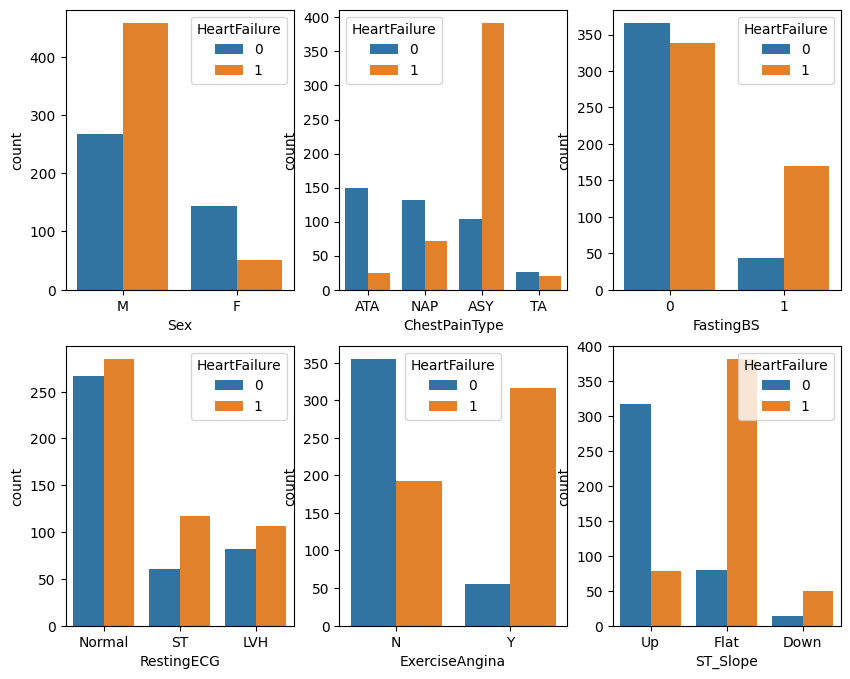

In [10]:
cat_col = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
fig, axes = plt.subplots(2,3, figsize=(10,8))
axes = axes.flatten()
for i, cat in enumerate(cat_col):
  sns.countplot(data=df, x=cat_col[i], hue='HeartFailure', ax=axes[i])
plt.show()


#### From the graphs provided above we can observe some informations:
*   Males tend to have higher chance of getting heart failure compared to female, this is due to some reasons such as difference in hormone level, cholesterol build up (maybe alcohol comsumption), lifestyle factors (smoking, stress)
*   NAP (Non-Anginal Pain) type is a type of chest pain that not caused by heart issues, ATA (Atypical Agnia) does not fully meet the criteria for typical angina so it make sense that people tend to have lower chance of heart failure. However, in the case of ASY (asymptomatic chest pain), a person have very higher chance to get heart failure this is due to uncaution in lifestyle when they think they dont have any pain mean they are healthy but bad lifestyle will change, TA (typical agnia) type is very balanced.


*   FastingBS refer to blood sugar and in the dataset, the value 1 mean greater than 120 hence it is make sense in the 1 label, the chance of getting heart failure is very high
*   RestingECG also known as resting electrocardiogram results and the chance of heart failure between all the 3 category is very balanced


*   ExerciseAngina is describe whether a person got chest pain when they exercise and we can see clearly that people with chest pain while exercise (category 1) have higher chance of heart failure which is make sense.
*   Lastly, according to the graph, if a person has Up status in ST-Slope, they likely to have lower chance of heart failure.







### We like to check if the amount of the result is balance or not because if the output is unbalanced, the Machine Learning Algorithm will be bias toward it

<Axes: xlabel='HeartFailure', ylabel='count'>

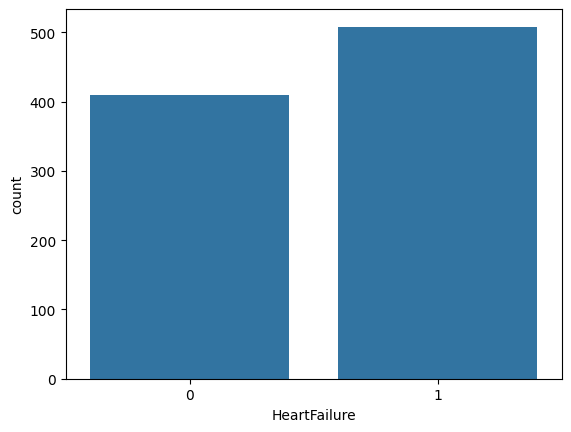

In [11]:
sns.countplot(data=df, x='HeartFailure')

### Now check the numerical features with respect to the output

In [12]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


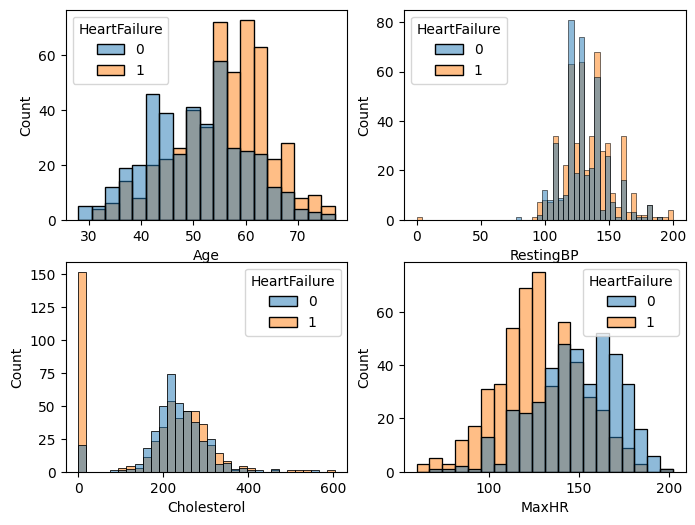

In [13]:
num_col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']
fig, ax = plt.subplots(2,2, figsize=(8,6))
ax = ax.flatten() # Turn this into 1D array since it is easier to loop through
for i, num in enumerate(num_col):
  sns.histplot(data=df, x=num_col[i], hue='HeartFailure', ax= ax[i]) # we use ax[i] since it is now a 1D shape
plt.show()

### From the information provided above we can conclude some informations:


*   In the Age with respect to HeartFailure, we see that people older than 55 tend to have higher chance of hear failure which is very common thing in real life.
*   Since the value of RestingBP very high so we assumed it to be the Systolic, and the distribution is kind of normal and we see some outlier below 100 and we see that above 120 BP, the chance of heart failure is higher


*   Same story as RestingBP, the Cholesterol has normal distribution and there is also outliers in the distribution and the outliers in the graph mostly indicated sign of heart failure which is make sense because this is not a normal cholesterol level anymore.
*   Lastly, MaxHR with respects Heart Failure, there is a normal distribution and we can clearly see that chance of getting Heart Failure is lower when a Heart Rate is higher than 125.





### As described above, we should deal with the outliers in the RestingBP and Cholesterol since those value may effect our Models

In [14]:
# Cholesterol
q1 = np.quantile(df['Cholesterol'], 0.25)
q3 = np.quantile(df['Cholesterol'], 0.75)
iqr = q3 - q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
print(q1)
print(q3)
print(f'The lower bound is: {min}')
print(f'The upper bound is: {max}')

173.25
267.0
The lower bound is: 32.625
The upper bound is: 407.625


In [15]:
# RestingBP
q1_bp = np.quantile(df['RestingBP'], 0.25)
q3_bp = np.quantile(df['RestingBP'], 0.75)
iqr_bp = q3_bp - q1_bp
min_bp = q1_bp - 1.5*iqr_bp
max_bp = q3_bp + 1.5*iqr_bp
print(q1_bp)
print(q3_bp)
print(f'The lower bound is: {min_bp}')
print(f'The upper bound is: {max_bp}')

120.0
140.0
The lower bound is: 90.0
The upper bound is: 170.0


In [16]:
# Replace the outliers of RestingBP with it median
df['RestingBP'] = df['RestingBP'].apply(lambda x: df['RestingBP'].median() if x < min_bp else x)

<Axes: xlabel='RestingBP', ylabel='Count'>

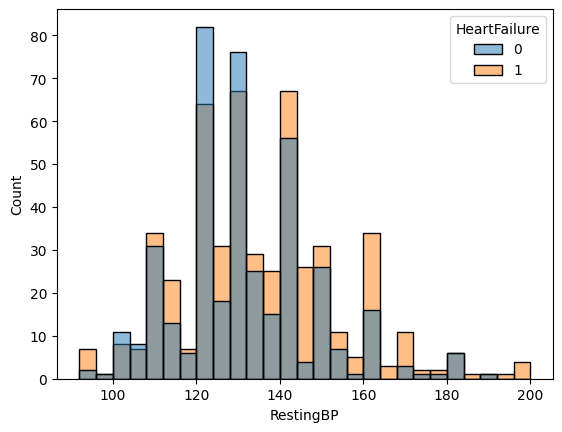

In [17]:
sns.histplot(data=df, x='RestingBP', hue='HeartFailure')

<Axes: xlabel='Cholesterol'>

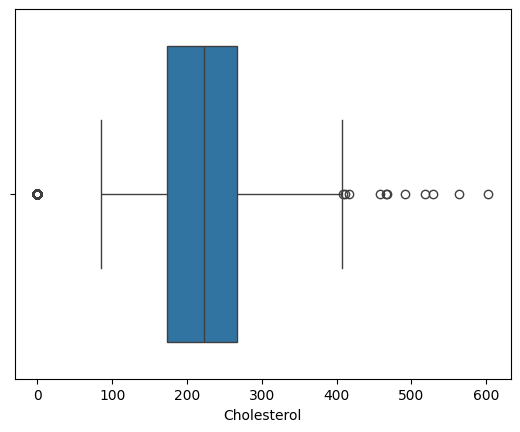

In [18]:
sns.boxplot(data=df, x='Cholesterol')

In [19]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


In [20]:
df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
293,65,M,ASY,115.0,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95.0,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105.0,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145.0,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110.0,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122.0,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130.0,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102.0,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130.0,0,0,LVH,122,Y,1.0,Flat,1


In [21]:
df['Cholesterol_is_zero'] = (df['Cholesterol'] == 0).astype(int)

# Step 2: Replace zero with median
median_chol = df.loc[df['Cholesterol'] > 0, 'Cholesterol'].median()
df['Cholesterol'] = df['Cholesterol'].replace(0, median_chol)

In [22]:
df['Cholesterol'] = df['Cholesterol'].apply(lambda x: df['Cholesterol'].median() if x > max else x)

<Axes: xlabel='Cholesterol', ylabel='Count'>

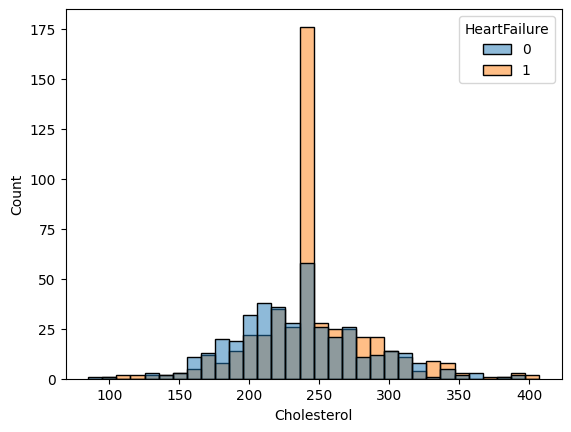

In [23]:
sns.histplot(data=df, x='Cholesterol', hue='HeartFailure')

In [24]:
df.shape

(918, 13)

In [25]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
237.0,189
254.0,11
223.0,10
220.0,10
204.0,9
...,...
353.0,1
278.0,1
157.0,1


## Perform Feature Engineering

In [26]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure,Cholesterol_is_zero
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1,0
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1,0
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1,0
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1,0
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1,0
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1,0


In [27]:
col_to_one_hot_encode = ['ChestPainType', 'RestingECG']
df = pd.get_dummies(data=df, columns=col_to_one_hot_encode)

In [28]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [29]:
df['Sex'].replace({'M': 1, 'F':0}, inplace=True)

In [30]:
df['ExerciseAngina'].replace({'Y': 1, 'N':0}, inplace=True)

In [31]:
df['ST_Slope'].replace({'Down': 0, 'Flat':1, 'Up':2}, inplace=True)

In [32]:
df = df.astype(int)

In [33]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure,Cholesterol_is_zero,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0,2,0,0,0,1,0,0,0,1,0
1,49,0,160,180,0,156,0,1,1,1,0,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0,2,0,0,0,1,0,0,0,0,1
3,48,0,138,214,0,108,1,1,1,1,0,1,0,0,0,0,1,0
4,54,1,150,195,0,122,0,0,2,0,0,0,0,1,0,0,1,0


## Model Training

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [35]:
X = df.drop(columns=['HeartFailure'], axis=1)
y = df['HeartFailure']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state=2025)

In [37]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [38]:
log_model = LogisticRegression(random_state=2025)
log_model.fit(x_train_scaled, y_train)
log_pred = log_model.predict(x_test_scaled)
print(f'Accuracy: {((accuracy_score(y_test, log_pred))*100):.2f}%')
print(confusion_matrix(y_test, log_pred))

Accuracy: 84.31%
[[112  26]
 [ 22 146]]


In [39]:
rf_model = RandomForestClassifier(random_state=2025)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
print(f'Accuracy: {(accuracy_score(y_test, rf_pred))*100:.2f}%')
print(confusion_matrix(y_test,rf_pred))

Accuracy: 84.97%
[[110  28]
 [ 18 150]]


In [40]:
tree_model = DecisionTreeClassifier(random_state=2025)
tree_model.fit(x_train, y_train)
tree_pred = tree_model.predict(x_test)
print(f'Accuracy: {(accuracy_score(y_test, tree_pred))*100:.2f}%')
print(confusion_matrix(tree_pred, y_test))

Accuracy: 76.80%
[[106  39]
 [ 32 129]]


In [41]:
xg_model = XGBClassifier(random_state=2025)
xg_model.fit(x_train, y_train)
xg_pred = xg_model.predict(x_test)
print(f'Accuracy: {(accuracy_score(y_test, xg_pred))*100:.2f}%')
print(confusion_matrix(xg_pred, y_test))

Accuracy: 84.31%
[[112  22]
 [ 26 146]]


Look likes Random Forest works the best among all models
## Try cross-validation for all models

In [48]:
log_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Supports L1 & L2
    'class_weight': [None, 'balanced'],
    'max_iter': [100,200,300,400]
}
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
param_grid_xg = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
log_cv = GridSearchCV(estimator=log_model, param_grid=log_param_grid, cv=5, scoring='accuracy')
rf_cv = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')
tree_cv = GridSearchCV(estimator=tree_model, param_grid=param_grid_dt, cv=5, scoring='accuracy')
xg_cv = GridSearchCV(estimator=xg_model, param_grid=param_grid_xg, cv=5, scoring='accuracy')

In [43]:
log_cv.fit(x_train_scaled, y_train)
print(log_cv.best_params_)
print(log_cv.best_score_)

# Use the best parameter for the model
logistic_model_best = log_cv.best_estimator_
logistic_y_pred = logistic_model_best.predict(x_test_scaled)
print(accuracy_score(logistic_y_pred, y_test))
print(confusion_matrix(logistic_y_pred, y_test))

{'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.8546181527389045
0.8464052287581699
[[113  22]
 [ 25 146]]


In [51]:
rf_cv.fit(x_train, y_train)
print(rf_cv.best_params_)
print(rf_cv.best_score_)

# Use the best parameter for the model
randomForest_model_best = rf_cv.best_estimator_
randomForest_y_pred = randomForest_model_best.predict(x_test)
print(accuracy_score(randomForest_y_pred, y_test))
print(confusion_matrix(randomForest_y_pred, y_test))

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.8693056110888978
0.8562091503267973
[[110  16]
 [ 28 152]]


In [52]:
xg_cv.fit(x_train, y_train)
print(xg_cv.best_params_)
print(xg_cv.best_score_)

# Use the best parameter for the model
xgboost_model_best = xg_cv.best_estimator_
xgboost_y_pred = xgboost_model_best.predict(x_test)
print(accuracy_score(xgboost_y_pred, y_test))
print(confusion_matrix(xgboost_y_pred, y_test))

{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
0.8594562175129947
0.8627450980392157
[[112  16]
 [ 26 152]]


In [61]:
tree_cv.fit(x_train_scaled, y_train)
print(tree_cv.best_params_)
print(tree_cv.best_score_)

# Use the best parameter for the model
decisionTree_model_best = tree_cv.best_estimator_
decisionTree_y_pred = decisionTree_model_best.predict(x_test_scaled)
print(accuracy_score(decisionTree_y_pred, y_test))
print(confusion_matrix(decisionTree_y_pred, y_test))

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20}
0.848060775689724
0.8202614379084967
[[115  32]
 [ 23 136]]


Still we can see that Random Forest is slightly better than Logistic Regression and Decision Tree
#### Since the predict() function use default 0.5 as threshold and our goal is to reduce the False Negative and maximize the Recall in this type of problem so we will try different threshold

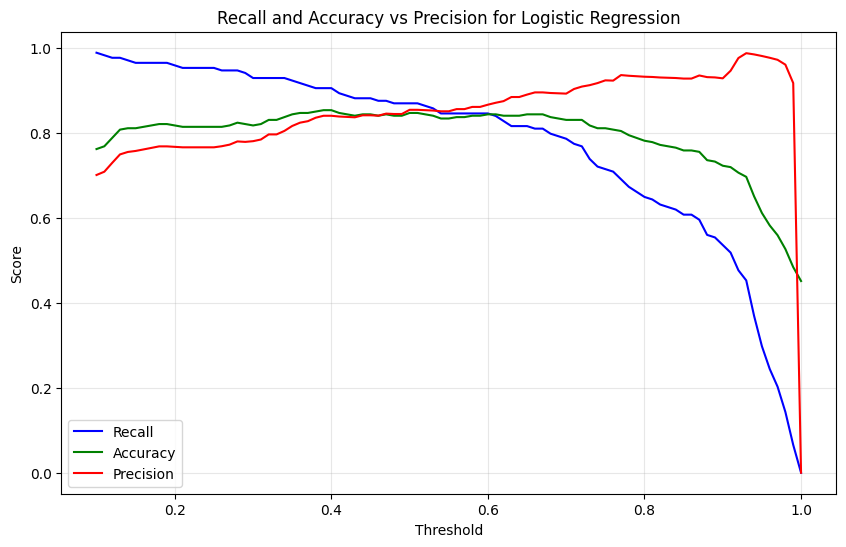

In [46]:
y_probs_log = logistic_model_best.predict_proba(x_test_scaled)[:, 1]

# Define thresholds
thresholds = np.arange(0.1, 1.01, 0.01)

recalls = []
accuracies = []
precision = []

# Calculate recall and accuracy for each threshold
for t in thresholds:
    y_pred_t = (y_probs_log >= t).astype(int)
    recalls.append(recall_score(y_test, y_pred_t))
    accuracies.append(accuracy_score(y_test, y_pred_t))
    precision.append(precision_score(y_test, y_pred_t))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall', color='blue')
plt.plot(thresholds, accuracies, label='Accuracy', color='green')
plt.plot(thresholds, precision, label='Precision', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Recall and Accuracy vs Precision for Logistic Regression')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

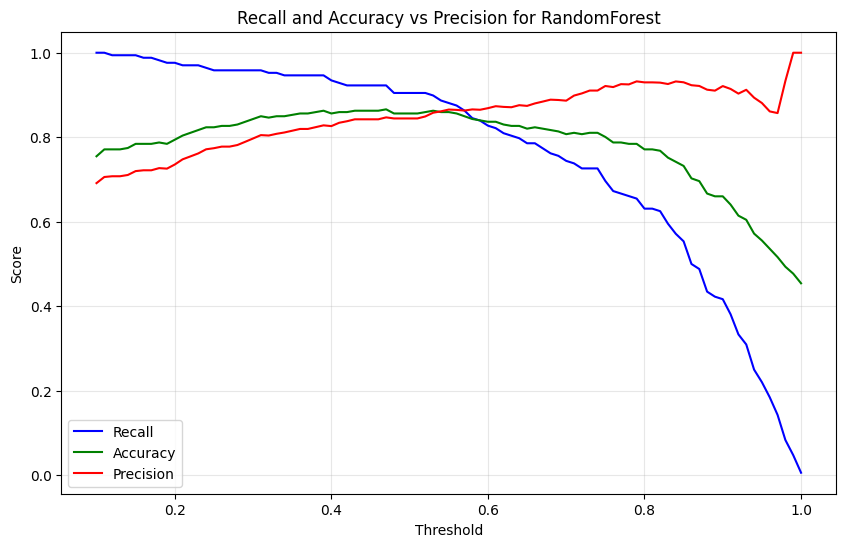

In [53]:
y_probs_rf = randomForest_model_best.predict_proba(x_test)[:, 1]

# Define thresholds
thresholds = np.arange(0.1, 1.01, 0.01)

recalls = []
accuracies = []
precision = []

# Calculate recall and accuracy for each threshold
for t in thresholds:
    y_pred_t = (y_probs_rf >= t).astype(int)
    recalls.append(recall_score(y_test, y_pred_t))
    accuracies.append(accuracy_score(y_test, y_pred_t))
    precision.append(precision_score(y_test, y_pred_t))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall', color='blue')
plt.plot(thresholds, accuracies, label='Accuracy', color='green')
plt.plot(thresholds, precision, label='Precision', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Recall and Accuracy vs Precision for RandomForest')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

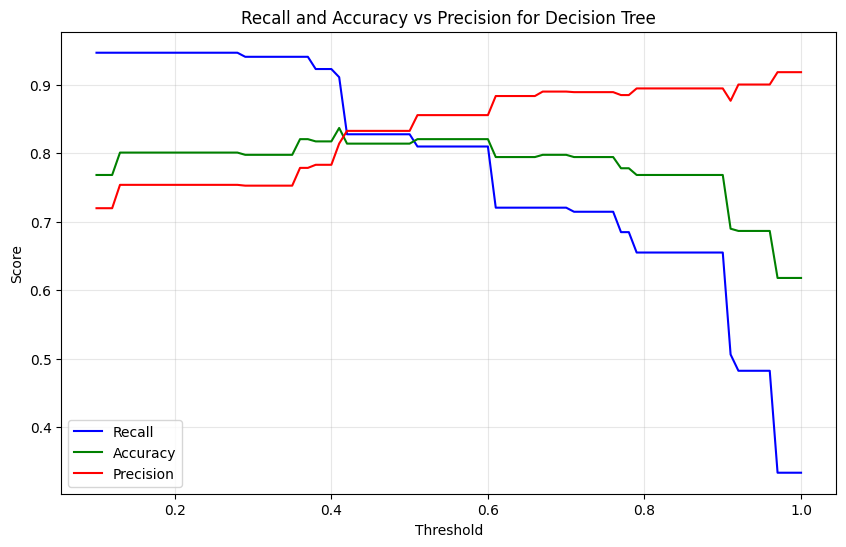

In [62]:
y_probs_tree = decisionTree_model_best.predict_proba(x_test_scaled)[:, 1]

# Define thresholds
thresholds = np.arange(0.1, 1.01, 0.01)

recalls = []
accuracies = []
precision = []

# Calculate recall and accuracy for each threshold
for t in thresholds:
    y_pred_t = (y_probs_tree >= t).astype(int)
    recalls.append(recall_score(y_test, y_pred_t))
    accuracies.append(accuracy_score(y_test, y_pred_t))
    precision.append(precision_score(y_test, y_pred_t))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall', color='blue')
plt.plot(thresholds, accuracies, label='Accuracy', color='green')
plt.plot(thresholds, precision, label='Precision', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Recall and Accuracy vs Precision for Decision Tree')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

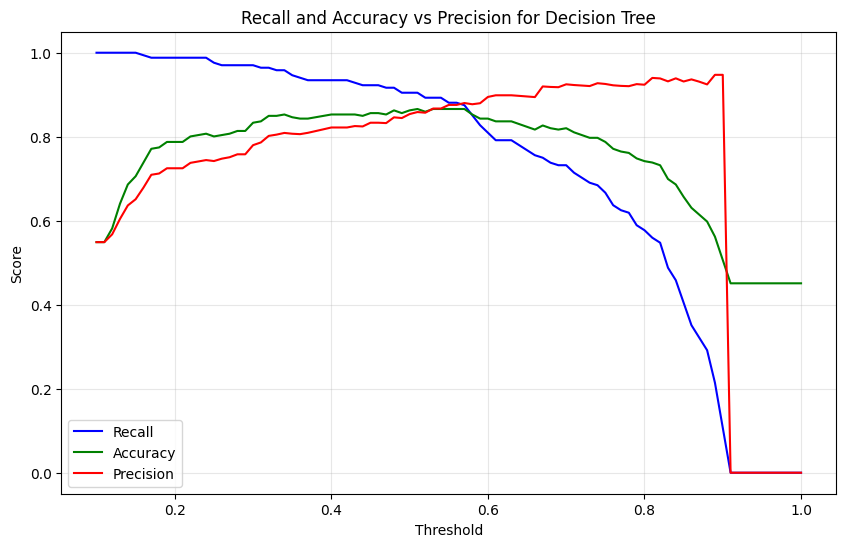

In [55]:
y_probs_xgboost = xgboost_model_best.predict_proba(x_test)[:, 1]

# Define thresholds
thresholds = np.arange(0.1, 1.01, 0.01)

recalls = []
accuracies = []
precision = []

# Calculate recall and accuracy for each threshold
for t in thresholds:
    y_pred_t = (y_probs_xgboost>= t).astype(int)
    recalls.append(recall_score(y_test, y_pred_t))
    accuracies.append(accuracy_score(y_test, y_pred_t))
    precision.append(precision_score(y_test, y_pred_t))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall', color='blue')
plt.plot(thresholds, accuracies, label='Accuracy', color='green')
plt.plot(thresholds, precision, label='Precision', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Recall and Accuracy vs Precision for XGBoost Classifier')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [56]:
y_probs_logistic = logistic_model_best.predict_proba(x_test_scaled)[:, 1]

# Change threshold (example: 0.3 instead of 0.5)
threshold = 0.3
log_pred_threshold = (y_probs_logistic >= threshold).astype(int)

print("Recall:", recall_score(y_test, log_pred_threshold))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred_threshold))

Recall: 0.9285714285714286
Confusion Matrix:
 [[ 94  44]
 [ 12 156]]


In [58]:
y_probs_randomForest = randomForest_model_best.predict_proba(x_test)[:, 1]

# Change threshold (example: 0.3 instead of 0.5)
threshold = 0.3
log_pred_threshold = (y_probs_randomForest >= threshold).astype(int)

print("Recall:", recall_score(y_test, log_pred_threshold))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred_threshold))

Recall: 0.9583333333333334
Confusion Matrix:
 [[ 97  41]
 [  7 161]]


In [67]:
y_probs_XGBOOST = xgboost_model_best.predict_proba(x_test)[:, 1]

# Change threshold (example: 0.3 instead of 0.5)
threshold = 0.3
log_pred_threshold = (y_probs_XGBOOST >= threshold).astype(int)

print("Recall:", recall_score(y_test, log_pred_threshold))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred_threshold))

Recall: 0.9702380952380952
Confusion Matrix:
 [[ 92  46]
 [  5 163]]


In [63]:
y_probs_decisionTree = decisionTree_model_best.predict_proba(x_test_scaled)[:, 1]

# Change threshold (example: 0.3 instead of 0.5)
threshold = 0.3
log_pred_threshold = (y_probs_decisionTree >= threshold).astype(int)

print("Recall:", recall_score(y_test, log_pred_threshold))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred_threshold))

Recall: 0.9404761904761905
Confusion Matrix:
 [[ 86  52]
 [ 10 158]]


Overall, the XGBOOST and Random Forest model demonstrated the highest accuracy and recall, with the lowest number of false negatives and they very close to each other. But I think the trade-off for XGBOOST is a bit too much with higher False Positive compared to Random Forest so that not worth it so the best Model we could use is Random Forest in this situation. Although adjusting the threshold resulted in an increase in false positives, this trade-off is acceptable given the severity of heart failure. In a high-risk condition like this, prioritizing recall is critical—missing a true case could be life-threatening, whereas a false positive typically leads to additional diagnostic testing, which is a minor cost by comparison.

In [68]:
def heart_failure_prediction(model, observations, threshold=0.3):
  observation = [observations]
  prediction = model.predict_proba(observation)[:, 1]
  return (prediction >= threshold).astype(int)

## Use Joblib to deploy model

In [69]:
import pickle
import joblib

In [70]:
joblib.dump(randomForest_model_best, 'final_model.pkl')

['final_model.pkl']

In [ ]:
# from google.colab import files
# files.download('final_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>